Task pereformed
1. enhancement
2. sharpening
3. segmentation of POI
4. binarize the segmented
5. multiply the binarized with enhanced and sharpened final image
6. Calculate the hist of POI for one of the image from the particular class(ready and not ready)
7. compare the hist value with other images POI using
i. Chi_squared
ii. correlation coffecient


All the questions in the mid term project are done step  y step and copied in power point respectively, Conclusion and comparision are on the power point.

In [135]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io
from google.colab.patches import cv2_imshow

**Question 1**

In [136]:
image_nr1= cv2.imread("/content/not ready3.jpg", )
image_nr2= cv2.imread("/content/not ready1.jpg")
image_nr3= cv2.imread("/content/not ready2.jpg")
image_r1= cv2.imread("/content/ready3.jpg")
image_r2= cv2.imread("/content/ready1.jpg")
image_r3= cv2.imread("/content/ready2.jpg")


In [137]:
# Convert the image to grayscale
gray_image_nr1 = cv2.cvtColor(image_nr1, cv2.COLOR_BGR2GRAY)
gray_image_nr2 = cv2.cvtColor(image_nr2, cv2.COLOR_BGR2GRAY)
gray_image_nr3 = cv2.cvtColor(image_nr3, cv2.COLOR_BGR2GRAY)
gray_image_r1 = cv2.cvtColor(image_r1, cv2.COLOR_BGR2GRAY)
gray_image_r2 = cv2.cvtColor(image_r2, cv2.COLOR_BGR2GRAY)
gray_image_r3 = cv2.cvtColor(image_r3, cv2.COLOR_BGR2GRAY)
gray_list_r=[gray_image_r1,gray_image_r2,gray_image_r3]
gray_list_nr=[gray_image_nr1,gray_image_nr2,gray_image_nr3]

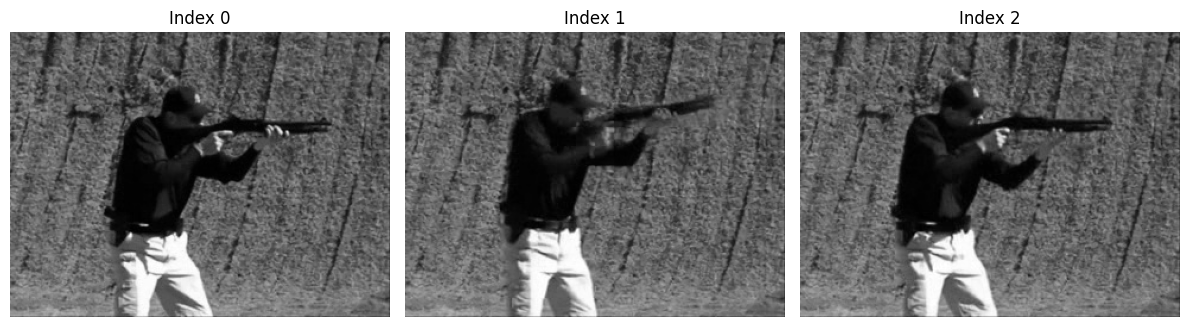

In [138]:
num_cols = 3
num_rows = (len(gray_list_r) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)
for i, (image, ax) in enumerate(zip(gray_list_r, axes.flatten())):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Index {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

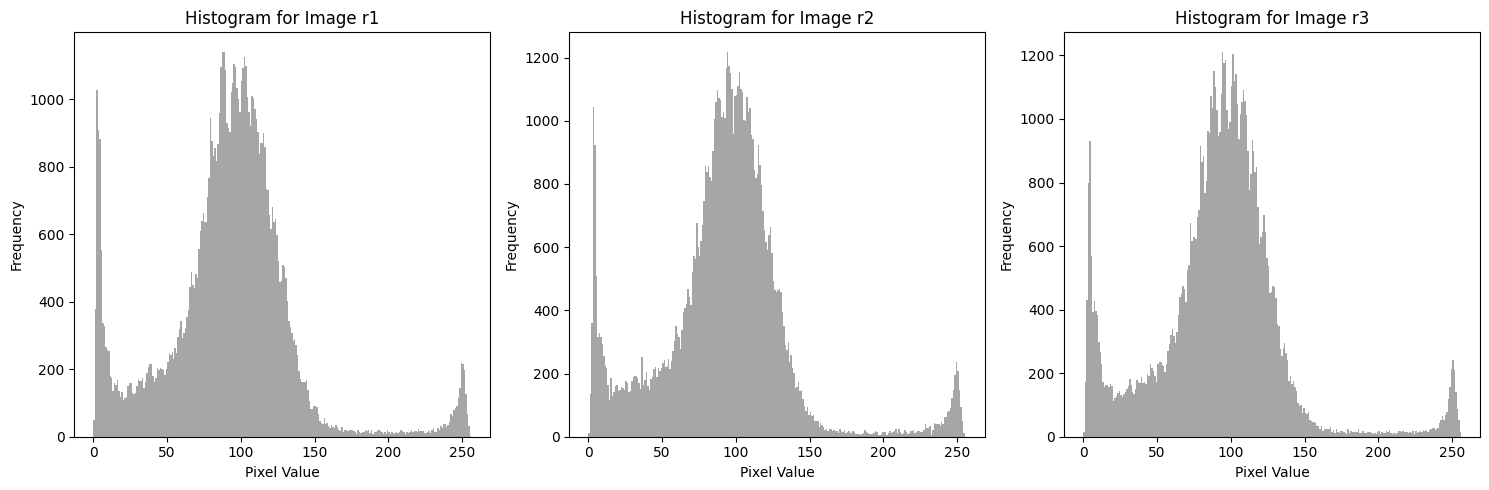

In [139]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(gray_image_r1.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(gray_image_r2.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r2')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(gray_image_r3.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r3')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()







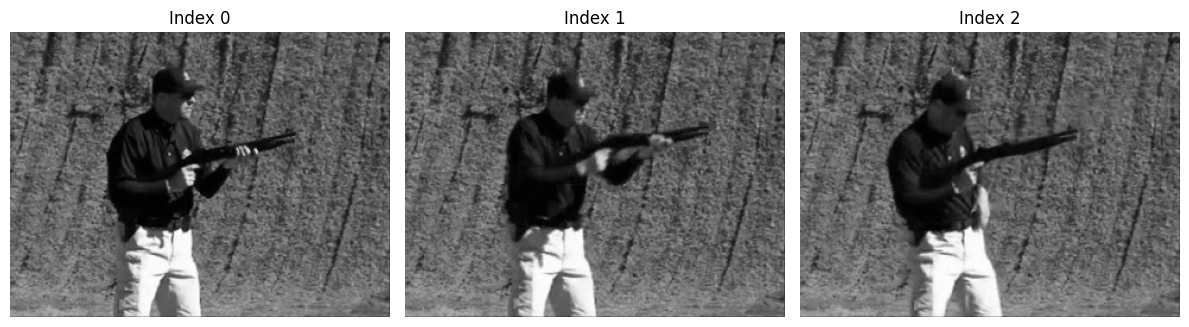

In [140]:

num_cols = 3
num_rows = (len(gray_list_nr) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)
for i, (image, ax) in enumerate(zip(gray_list_nr, axes.flatten())):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Index {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [141]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(gray_image_nr1.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(gray_image_nr2.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr2')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(gray_image_nr3.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr3')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()







**Question 2**

In [142]:
##contrast stretching uisng percentile based method and sharpening it with sobel method

In [143]:
def contrast_stretching_percentile(image, percentile_min=5, percentile_max=93):
    # Calculate the minimum and maximum pixel values based on percentiles
    min_val = np.percentile(image, percentile_min)
    max_val = np.percentile(image, percentile_max)

    # Apply contrast stretching and normalize to the 0-255 range
    stretched_image = np.clip((image - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)

    return stretched_image




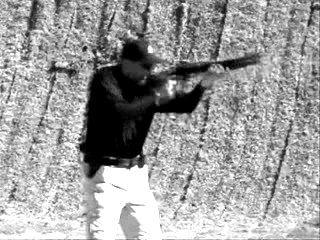

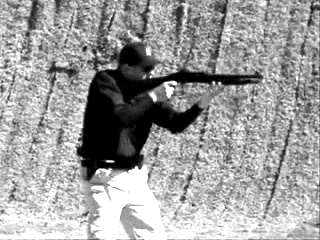

In [144]:
stretching_images_r = [contrast_stretching_percentile(img) for img in gray_list_r]

for i in stretching_images_r:
  cv2_imshow(i)

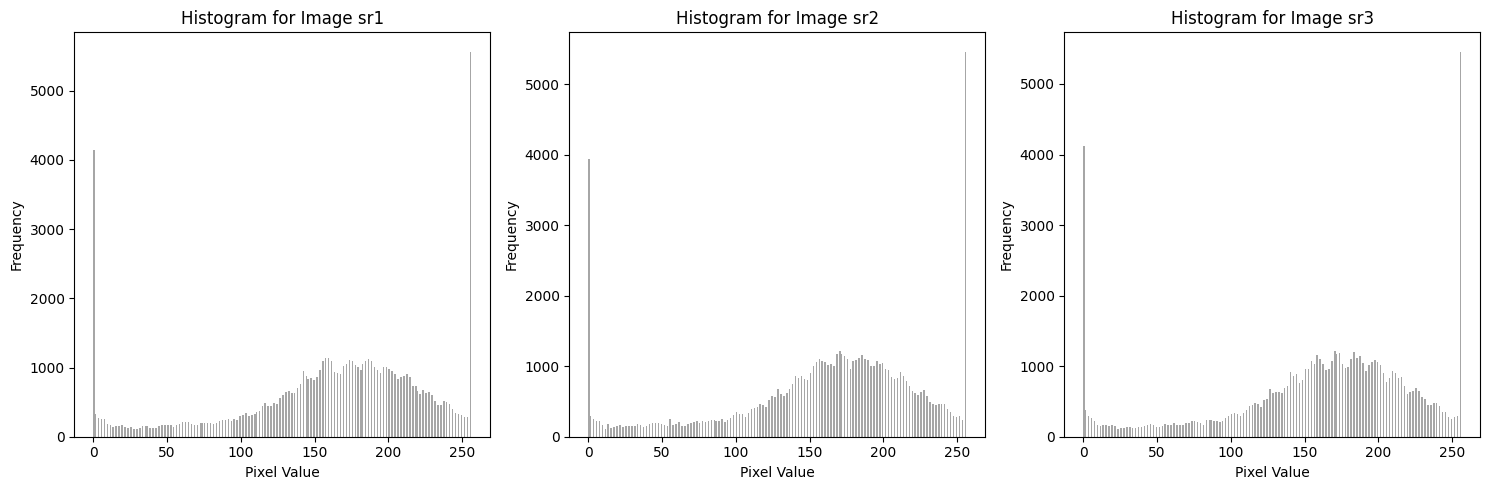

In [145]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(stretching_images_r[0].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image sr1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(stretching_images_r[1].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image sr2')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(stretching_images_r[2].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image sr3')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


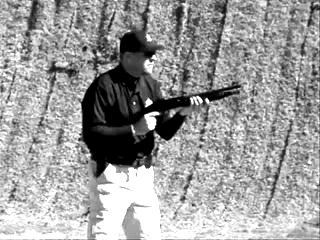

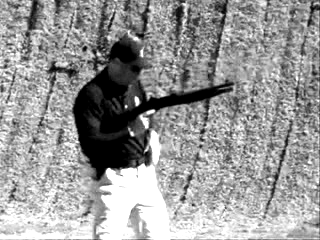

In [146]:
stretching_images_nr = [contrast_stretching_percentile(img) for img in gray_list_nr]

for i in stretching_images_nr:
  cv2_imshow(i)

In [147]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(stretching_images_nr[0].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image snr1')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(stretching_images_nr[1].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image snr2')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(stretching_images_nr[2].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image snr3')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1500x1000 with 0 Axes>

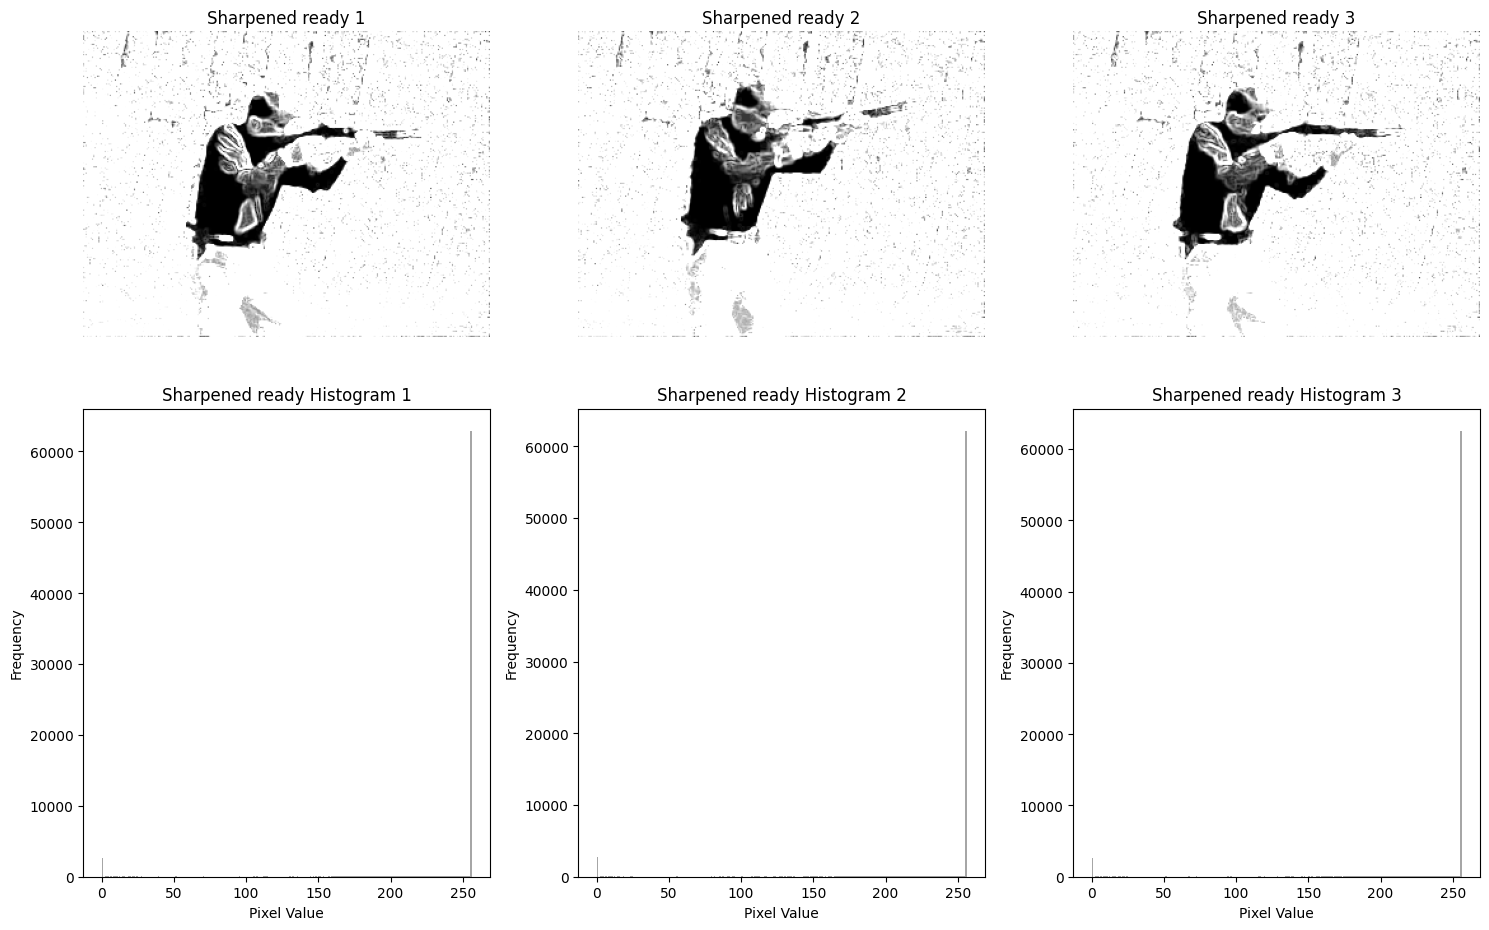

In [148]:


## Function to perform sharpening and plot histogram for a list of images of percentile based
def sharpen_and_plot(images, title_prefix):
    sharpened_images = []

    plt.figure(figsize=(15, 10))

    for i, image in enumerate(images, 1):
        # Apply the Sobel operator for sharpening
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Adjust the strength of sharpening
        sharpening_strength = 1.5

        # Create the sharpened image
        sharpened_image = image + sharpening_strength * gradient_magnitude

        # Clip values to the valid range [0, 255]
        sharpened_image = np.clip(sharpened_image, 0, 255)

        # Convert to uint8 for display
        sharpened_image = np.uint8(sharpened_image)

        # Append the sharpened image to the list
        sharpened_images.append(sharpened_image)

    return sharpened_images  # Return the list of sharpened images

sharpened_r = sharpen_and_plot(stretching_images_r, 'Group R')

fig, axs = plt.subplots(2, len(sharpened_r), figsize=(5 * len(sharpened_r), 10))

for i, sharpened_image in enumerate(sharpened_r):
    # Plot the sharpened image
    axs[0, i].imshow(sharpened_image, cmap='gray')
    axs[0, i].set_title(f'Sharpened ready {i+1}')
    axs[0, i].axis('off')

    # Plot the histogram
    axs[1, i].hist(sharpened_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    axs[1, i].set_title(f'Sharpened ready Histogram {i+1}')
    axs[1, i].set_xlabel('Pixel Value')
    axs[1, i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

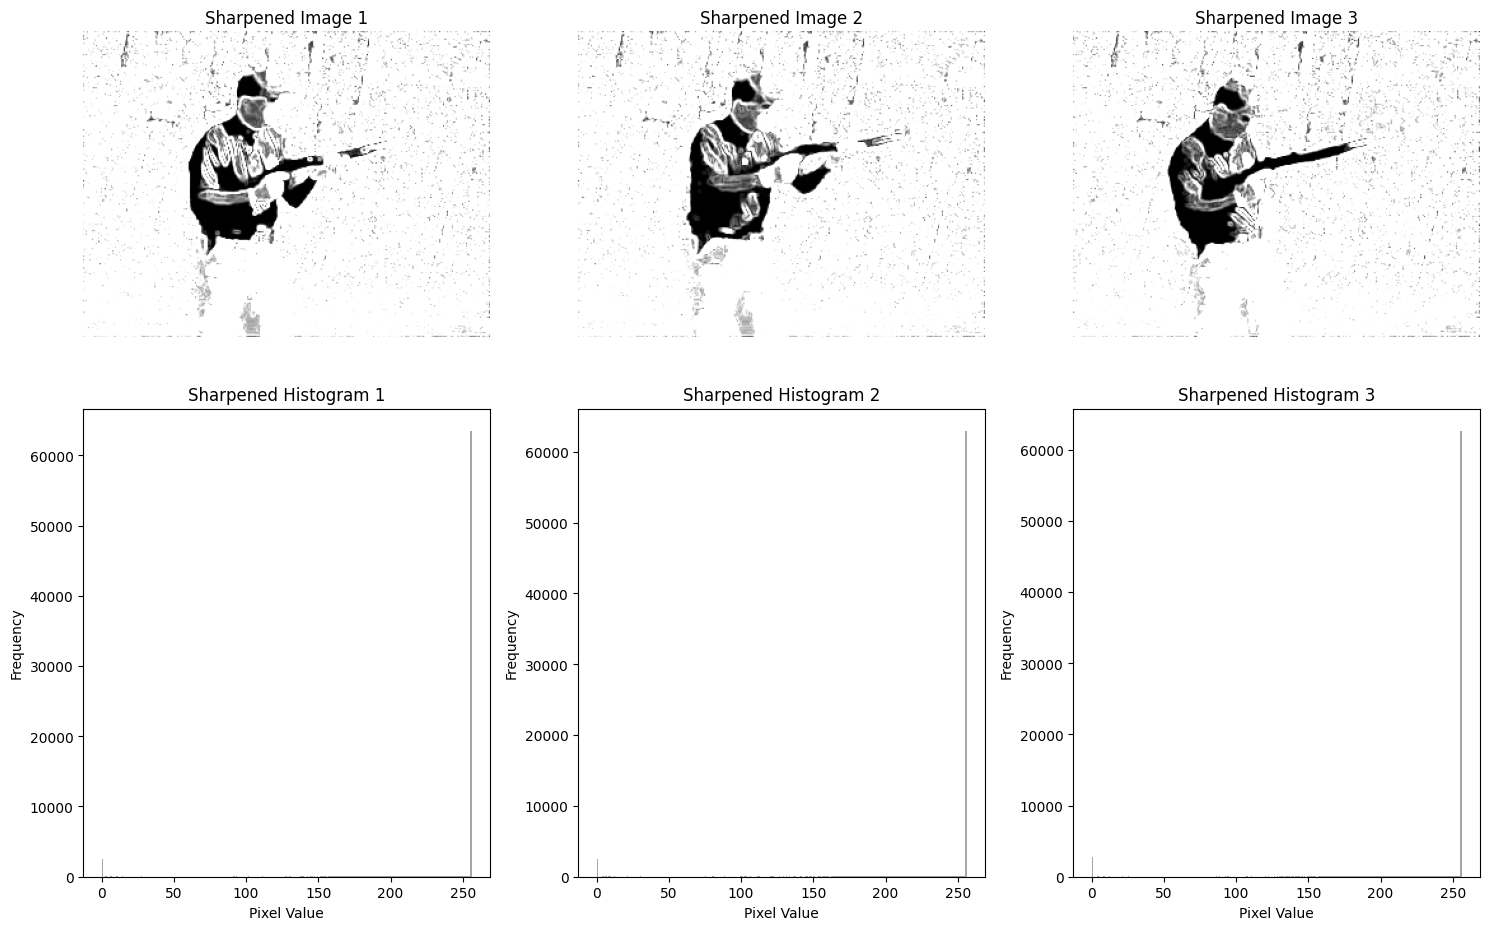

In [149]:
# Perform sharpening and plot histogram for the not ready group
sharpened_nr=sharpen_and_plot(stretching_images_nr, 'Group NR')
fig, axs = plt.subplots(2, len(sharpened_nr), figsize=(5 * len(sharpened_nr), 10))

for i, sharpened_image in enumerate(sharpened_nr):
    # Plot the sharpened image
    axs[0, i].imshow(sharpened_image, cmap='gray')
    axs[0, i].set_title(f'Sharpened Image {i+1}')
    axs[0, i].axis('off')

    # Plot the histogram
    axs[1, i].hist(sharpened_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    axs[1, i].set_title(f'Sharpened Histogram {i+1}')
    axs[1, i].set_xlabel('Pixel Value')
    axs[1, i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [150]:
## Second method of enhancement histogram equalization

In [151]:
def histogram_equalization(image):
    # Calculate the histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Calculate the CDF
    cdf = hist.cumsum()

    # Normalize the CDF
    nor_cdf = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Map the image using normalized CDF
    equalized = nor_cdf[image]

    # Convert the equalized image to uint8 data type
    equalized_image = equalized.astype(np.uint8)

    return equalized_image

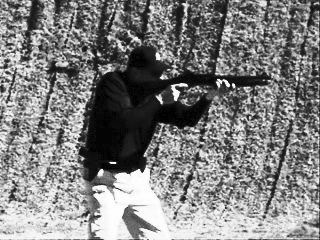

In [152]:
##for list of ready image
equalized_images_r = [histogram_equalization(img) for img in gray_list_r]

for i in equalized_images_r:
  cv2_imshow(i)

In [153]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(equalized_images_r[0].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r1 equa')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(equalized_images_r[1].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r2 equa')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(equalized_images_r[2].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image r3 equa')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

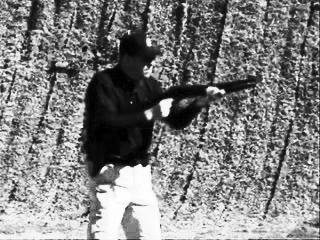

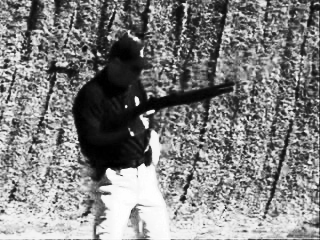

In [154]:
## for the list of not ready images
equalized_images_nr = [histogram_equalization(img) for img in gray_list_nr]
for i in equalized_images_nr:
  cv2_imshow(i)

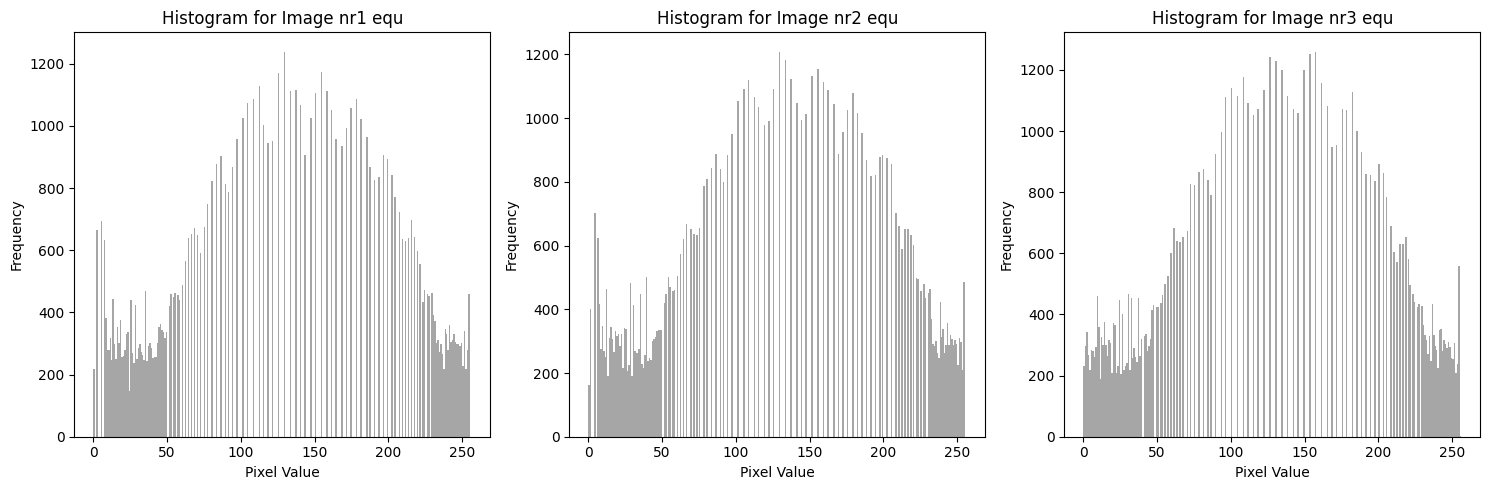

In [155]:
# Plot histogram for the first image
fig = plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(equalized_images_nr[0].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr1 equ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the second image
plt.subplot(1, 3, 2)
plt.hist(equalized_images_nr[1].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr2 equ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot histogram for the third image
plt.subplot(1, 3, 3)
plt.hist(equalized_images_nr[2].ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Histogram for Image nr3 equ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [156]:
## Image sharpening after histogram equalization method using sobel

<Figure size 1500x1000 with 0 Axes>

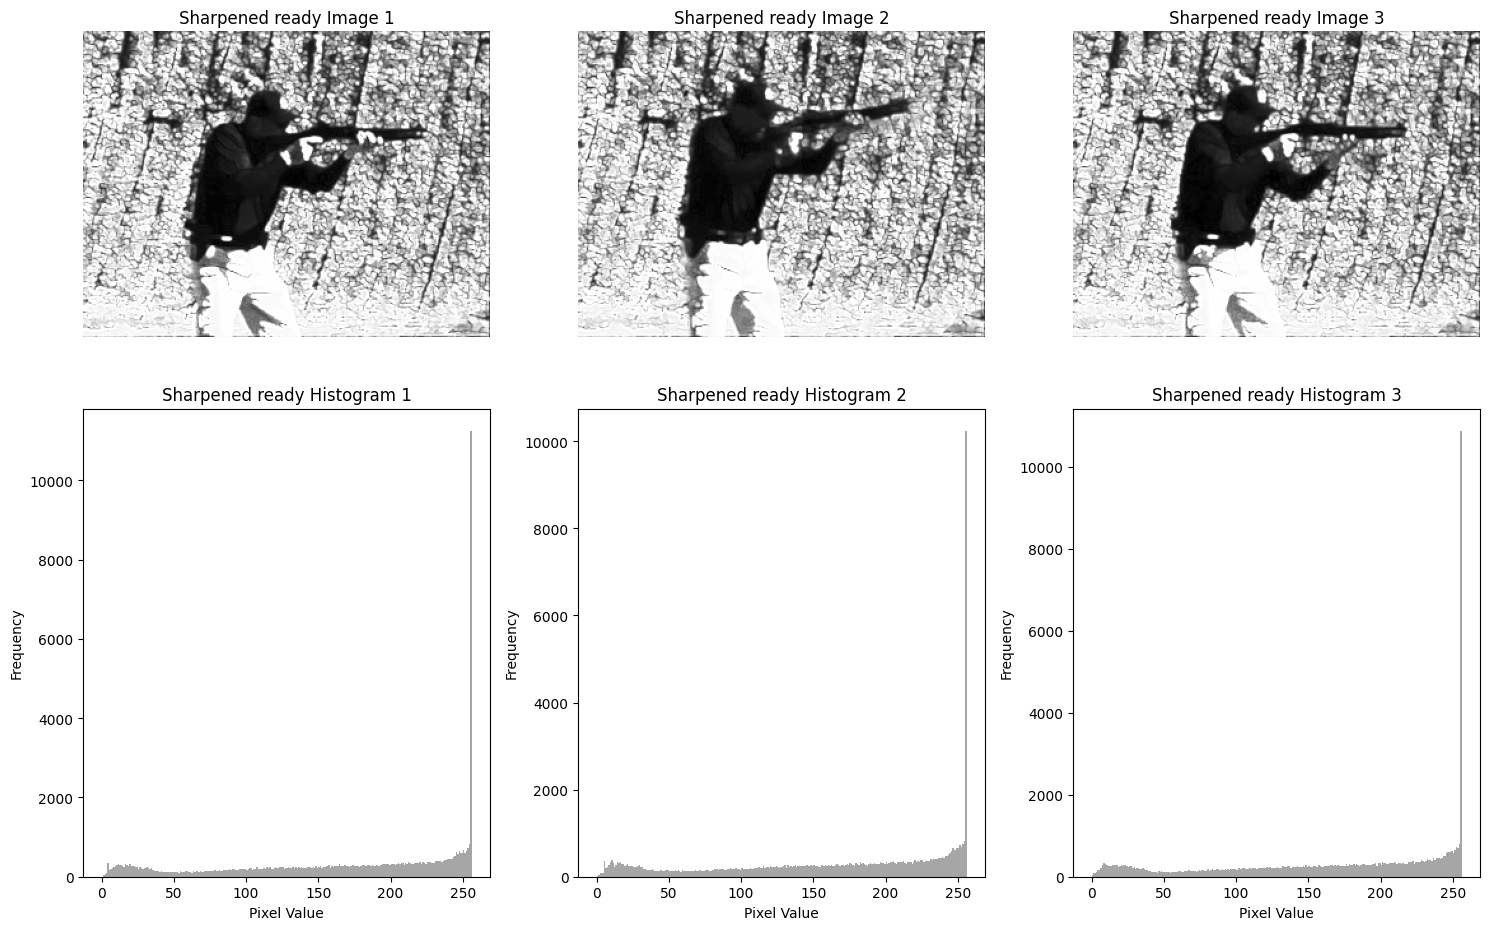

In [157]:


# Function to perform sharpening and plot histogram for a list of images
def sharpen_and_plot(images, title_prefix):
    sharpened_images = []  # To store the sharpened images

    plt.figure(figsize=(15, 10))

    for i, image in enumerate(images, 1):
        # Apply the Sobel operator for sharpening
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

        # Adjust the strength of sharpening
        sharpening_strength = 0.2

        # Create the sharpened image
        sharpened_image = image + sharpening_strength * gradient_magnitude

        # Clip values to the valid range [0, 255]
        sharpened_image = np.clip(sharpened_image, 0, 255)

        # Convert to uint8 for display
        sharpened_image = np.uint8(sharpened_image)

        # Append the sharpened image to the list
        sharpened_images.append(sharpened_image)

    return sharpened_images  # Return the list of sharpened images


sharpened_readye = sharpen_and_plot(equalized_images_r, 'Group R')
fig, axs = plt.subplots(2, len(sharpened_readye), figsize=(5 * len(sharpened_readye), 10))

for i, sharpened_image in enumerate(sharpened_readye):
    # Plot the sharpened image
    axs[0, i].imshow(sharpened_image, cmap='gray')
    axs[0, i].set_title(f'Sharpened ready Image {i+1}')
    axs[0, i].axis('off')

    # Plot the histogram
    axs[1, i].hist(sharpened_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    axs[1, i].set_title(f'Sharpened ready Histogram {i+1}')
    axs[1, i].set_xlabel('Pixel Value')
    axs[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

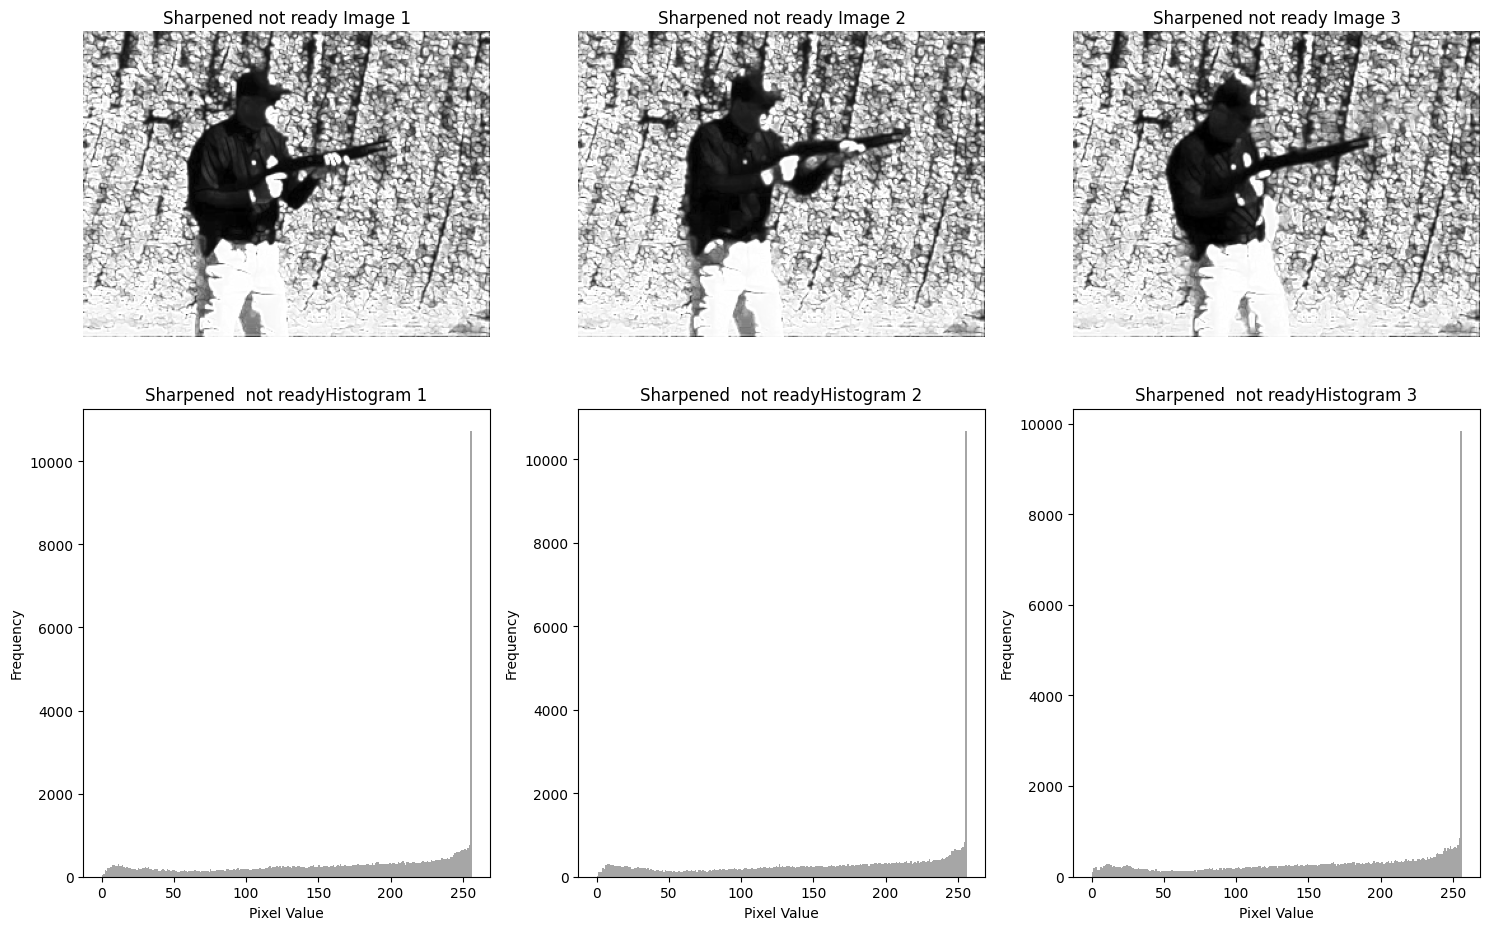

In [158]:
# Perform sharpening and plot histogram for the first group
sharpened_nre=sharpen_and_plot(equalized_images_nr, 'Group NR')
fig, axs = plt.subplots(2, len(sharpened_nre), figsize=(5 * len(sharpened_nre), 10))

for i, sharpened_image in enumerate(sharpened_nre):
    # Plot the sharpened image
    axs[0, i].imshow(sharpened_image, cmap='gray')
    axs[0, i].set_title(f'Sharpened not ready Image {i+1}')
    axs[0, i].axis('off')

    # Plot the histogram
    axs[1, i].hist(sharpened_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
    axs[1, i].set_title(f'Sharpened  not readyHistogram {i+1}')
    axs[1, i].set_xlabel('Pixel Value')
    axs[1, i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Question 3**

In [159]:
## Image segmentation using k mean and mean shift

In [160]:
## define the POI area in the images
def draw_square(image, center_x, center_y, square_size):
    # Create a copy of the image
    result_image = image.copy()

    # Calculate the coordinates of the square corners
    top_left = (center_x - square_size // 2, center_y - square_size // 2)
    bottom_right = (center_x + square_size // 2, center_y + square_size // 2)

    # Create a green square
    color = (0, 0, 0)  # Green color
    thickness = 2
    cv2.rectangle(result_image, top_left, bottom_right, color, thickness)

    return result_image

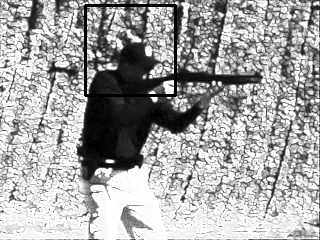

In [161]:
## apply the POI function to all the sharpened hist ready  images
image_0 = sharpened_readye[0]
result_image_0 = draw_square(image_0, 130,50,90)
cv2_imshow(result_image_0)


image_1 = sharpened_readye[1]
result_image_1 = draw_square(image_1, 130,50,90)
cv2_imshow(result_image_1)

image_2 = sharpened_readye[2]
result_image_2 = draw_square(image_2, 130,50,90)
cv2_imshow(result_image_2)

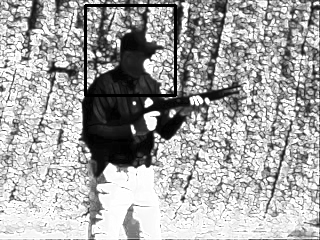

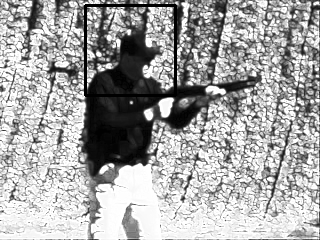

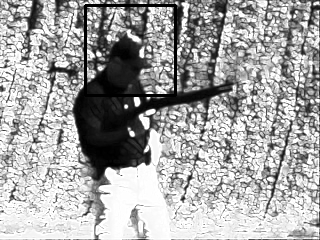

In [162]:
## apply the POI function to all the sharpened hist not  ready  images
image_3 = sharpened_nre[0]
result_image_3 = draw_square(image_3, 130,50,90)
cv2_imshow(result_image_3)


image_4 = sharpened_nre[1]
result_image_4 = draw_square(image_4, 130,50,90)
cv2_imshow(result_image_4)

image_5 = sharpened_nre[2]
result_image_5 = draw_square(image_5, 130,50,90)
cv2_imshow(result_image_5)

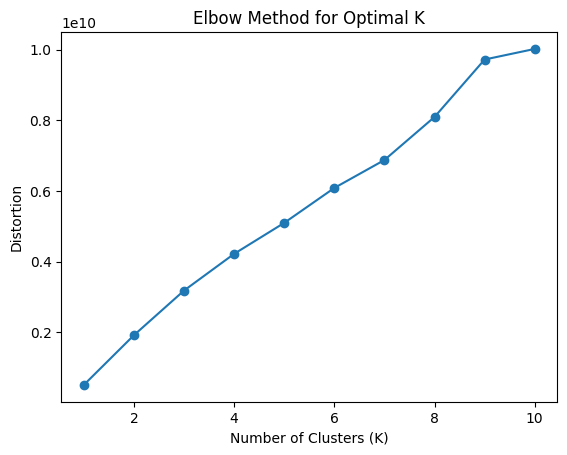

In [163]:
## to find the best value of k lets plot elbow plot
Z = result_image_0.flatten().reshape((-1, 1)).astype(np.float32)

# Use the Elbow Method to find optimal K
distortions = []
K_range = range(1, 11)
for k in K_range:
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, _, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    distortion = np.sum((Z - centers.flatten())**2)
    distortions.append(distortion)

# Plot the Elbow Method graph
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

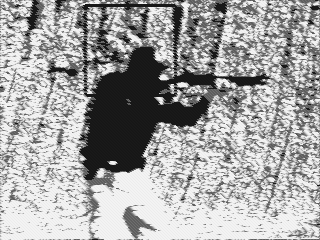

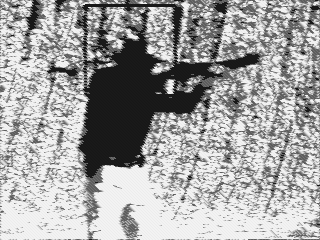

In [164]:
# Apply K-Means clustering to the region of interest for ready images
Z_kmeans = result_image_0.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6 # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_0 = centers_kmeans[labels_kmeans.flatten()].reshape(result_image_0.shape)


Z_kmeans = result_image_1.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6  # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_1 = centers_kmeans[labels_kmeans.flatten()].reshape(result_image_1.shape)

Z_kmeans = result_image_2.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6  # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_2 = centers_kmeans[labels_kmeans.flatten()].reshape(result_image_2.shape)


cv2_imshow(segmented_kmeans_roi_0)
cv2_imshow(segmented_kmeans_roi_1)
cv2_imshow(segmented_kmeans_roi_2)






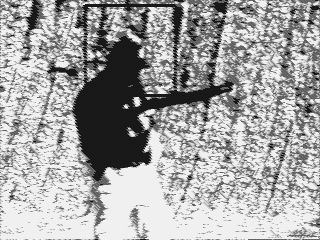

In [165]:
# Apply K-Means clustering to the region of interest for not ready images
Z_kmeans = result_image_3.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6  # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_3 = centers_kmeans[labels_kmeans.flatten()].reshape(result_image_3.shape)


Z_kmeans = result_image_4.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6  # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_4 = centers_kmeans[labels_kmeans.flatten()].reshape(result_image_4.shape)


Z_kmeans = result_image_5.reshape((-1, 3)).astype(np.float32)
criteria_kmeans = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K_kmeans = 6  # Number of clusters
_, labels_kmeans, centers_kmeans = cv2.kmeans(Z_kmeans, K_kmeans, None, criteria_kmeans, 10, cv2.KMEANS_RANDOM_CENTERS)
segmented_kmeans_roi_5= centers_kmeans[labels_kmeans.flatten()].reshape(result_image_5.shape)


cv2_imshow(segmented_kmeans_roi_3)
cv2_imshow(segmented_kmeans_roi_4)
cv2_imshow(segmented_kmeans_roi_5)


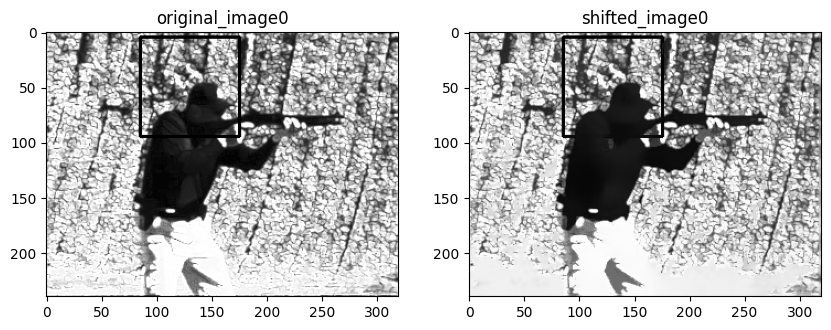

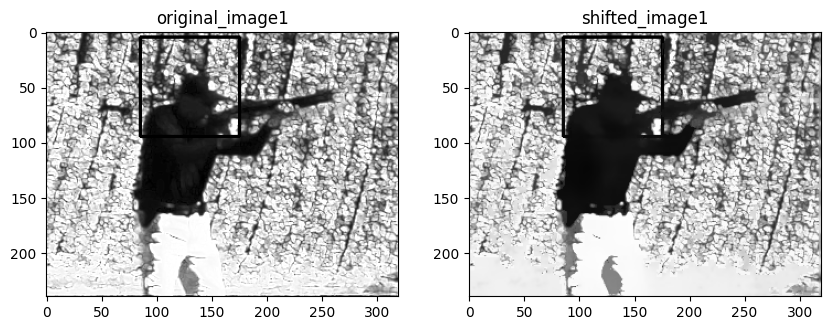

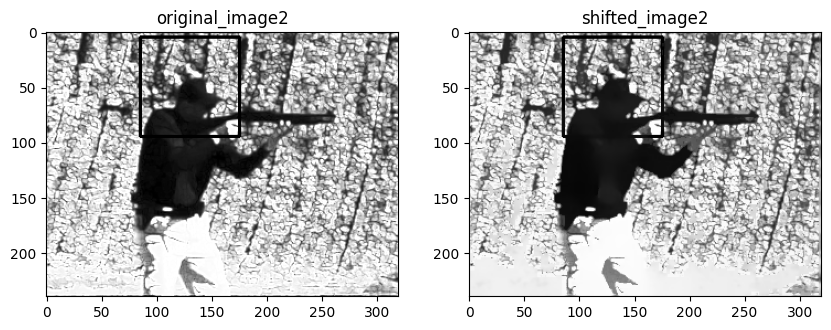

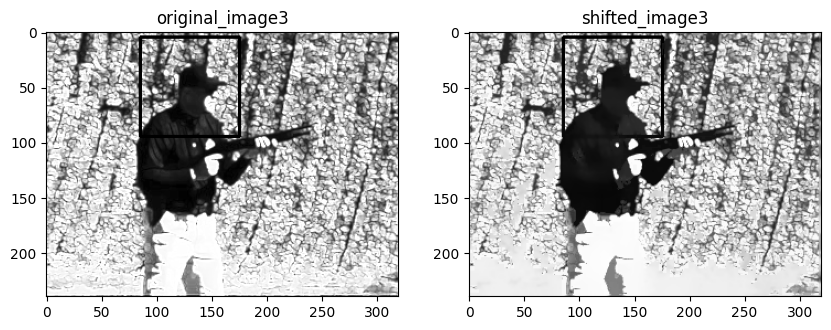

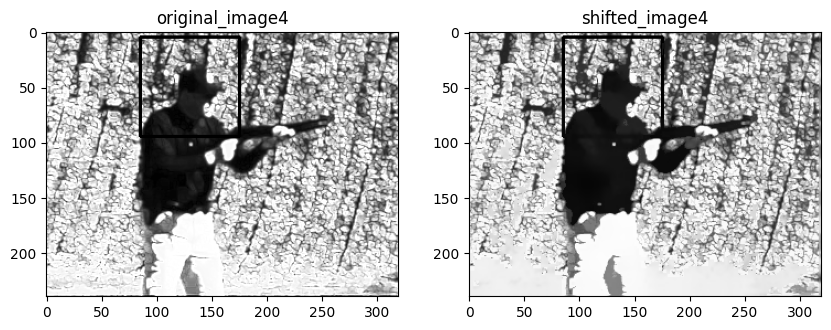

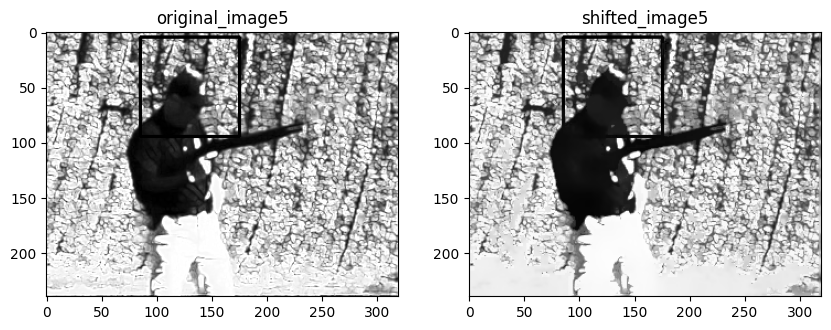

In [166]:
## Apply mean shift for all the images making a list
result_images_gray = [result_image_0, result_image_1, result_image_2, result_image_3, result_image_4, result_image_5]
shifted_images = []
# Apply Mean Shift to each image
for i, result_image_gray in enumerate(result_images_gray):
    # Convert grayscale to color (replicating the single channel)
    result_image_color = cv2.cvtColor(result_image_gray, cv2.COLOR_GRAY2BGR)

    # Apply Mean Shift
    shifted_image = cv2.pyrMeanShiftFiltering(result_image_color, 10, 30)
    shifted_images.append(shifted_image)
    # Visualize the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(result_image_gray, cmap='gray'), plt.title(f'original_image{i}')
    plt.subplot(1, 2, 2), plt.imshow(shifted_image, cmap='gray'), plt.title(f'shifted_image{i}')



In [167]:
## Choosing the mean shift for binarizing the images

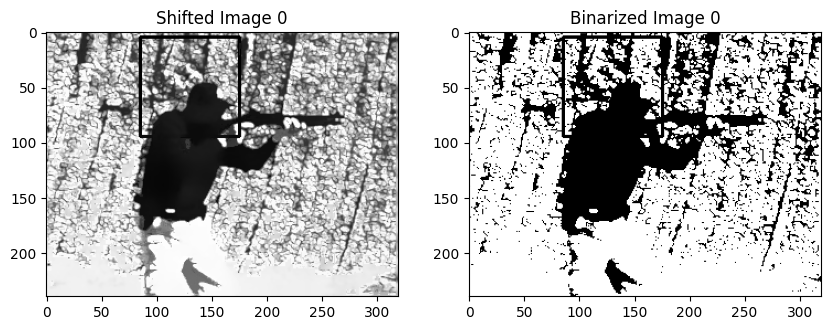

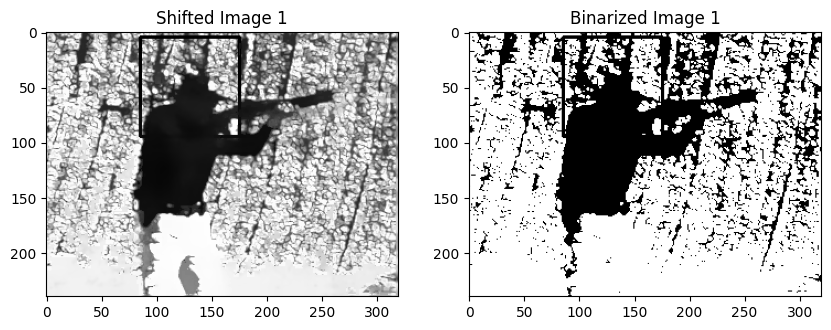

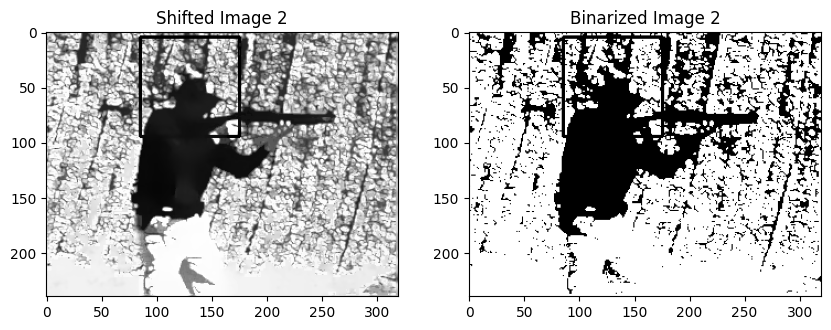

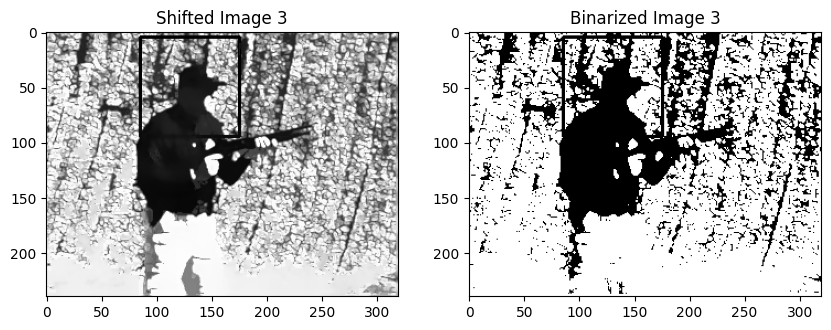

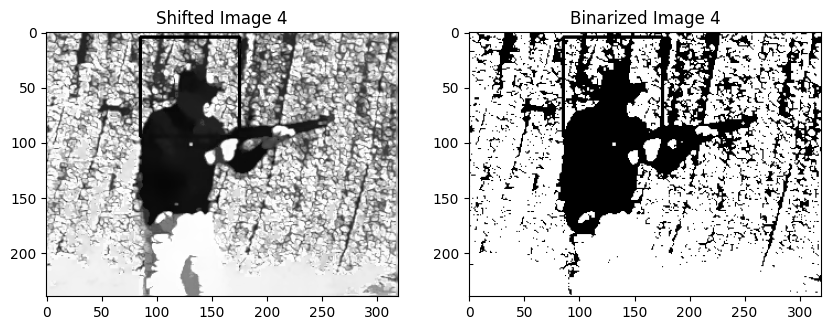

In [168]:
# Binarize each segmented image from both groups using binray thresholds
binarized_images = []
for i, shifted_image in enumerate(shifted_images):
  # Convert color image to grayscale
    shifted_image_gray = cv2.cvtColor(shifted_image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(shifted_image_gray, 127, 255, cv2.THRESH_BINARY)

    # Resize the binarized image to match the dimensions of result_image_0
    binary_image_resized = cv2.resize(binary_image, (result_images_gray[0].shape[1], result_images_gray[0].shape[0]))

    # Visualize the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(shifted_image_gray, cmap='gray'), plt.title(f'Shifted Image {i}')
    plt.subplot(1, 2, 2), plt.imshow(binary_image_resized, cmap='gray'), plt.title(f'Binarized Image {i}')

    # Append the resized binarized image to the list
    binarized_images.append(binary_image_resized)

plt.show()


**Q.4**

In [169]:
# Make sure the images have the same size
binarized_images[0].shape




(240, 320)

In [170]:
result_image_0.shape

(240, 320)

In [171]:
ready1= cv2.multiply(result_images_gray[0], binarized_images[0])
cv2_imshow(ready1)

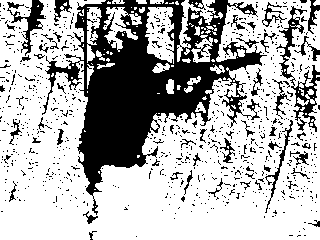

In [172]:
ready2= cv2.multiply(result_images_gray[1], binarized_images[1])
cv2_imshow(ready2)

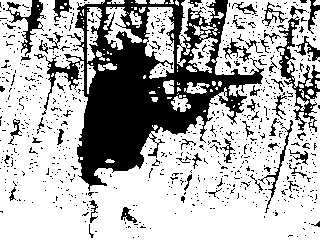

In [173]:
ready3= cv2.multiply(result_images_gray[2], binarized_images[2])
cv2_imshow(ready3)

In [174]:
n_ready1= cv2.multiply(result_images_gray[3], binarized_images[3])
cv2_imshow(n_ready1)

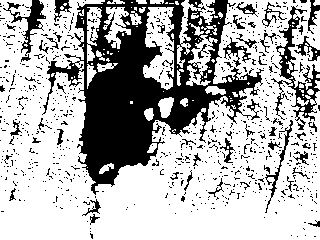

In [175]:
n_ready2= cv2.multiply(result_images_gray[4], binarized_images[4])
cv2_imshow(n_ready2)

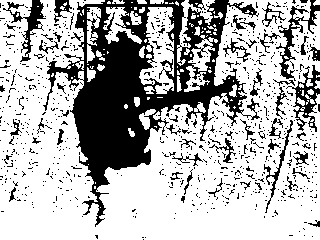

In [176]:
n_ready3= cv2.multiply(result_images_gray[5], binarized_images[5])
cv2_imshow(n_ready3)

**Question 5 and 6 together**

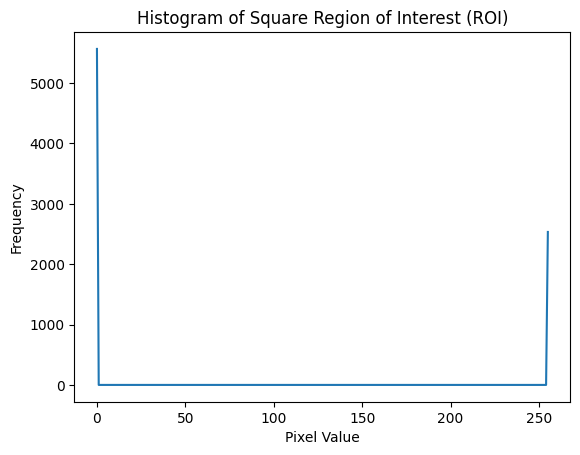

In [177]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask = np.zeros_like(ready1)
roi_mask[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist = cv2.calcHist([ready1], [0], roi_mask, [256], [0, 256])

# Plot the histogram
plt.plot(hist)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

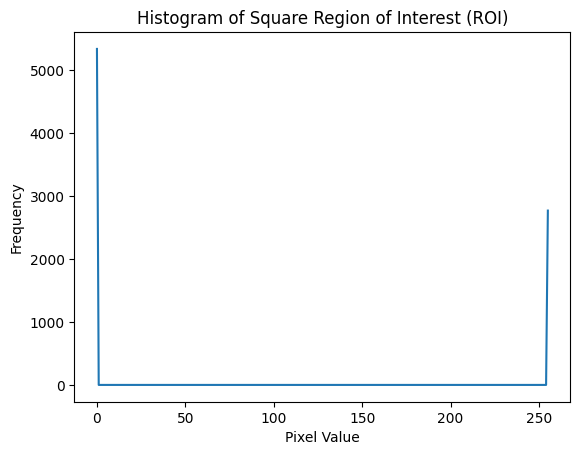

In [178]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask1 = np.zeros_like(ready2)
roi_mask1[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist2 = cv2.calcHist([ready2], [0], roi_mask1, [256], [0, 256])

# Plot the histogram
plt.plot(hist2)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

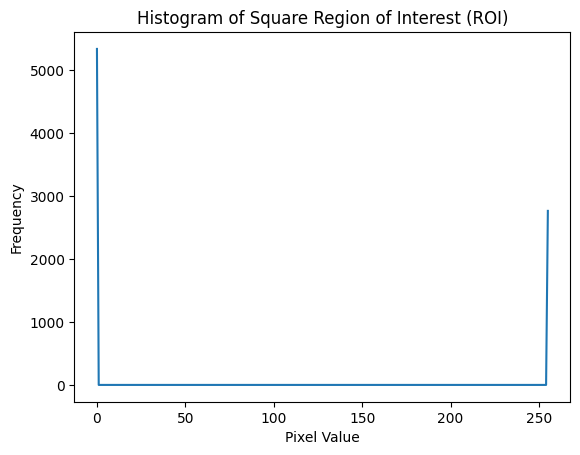

In [179]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask2 = np.zeros_like(ready3)
roi_mask2[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist3 = cv2.calcHist([ready3], [0], roi_mask2, [256], [0, 256])

# Plot the histogram
plt.plot(hist3)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [180]:
# Compute the chi-squared distance
chi_squared_distance1 = cv2.compareHist(hist, hist2, cv2.HISTCMP_CHISQR)



threshold = 1

if chi_squared_distance1 < threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are dissimilar.


In [181]:
chi_squared_distance1

31.177913541484394

In [182]:
# Compute the chi-squared distance
chi_squared_distance2 = cv2.compareHist(hist, hist3, cv2.HISTCMP_CHISQR)

# You can set a threshold to determine if the images are similar or not
threshold = 1  # Adjust this threshold based on your requirements

if chi_squared_distance2 < threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are dissimilar.


In [183]:
chi_squared_distance2

30.380217472131083

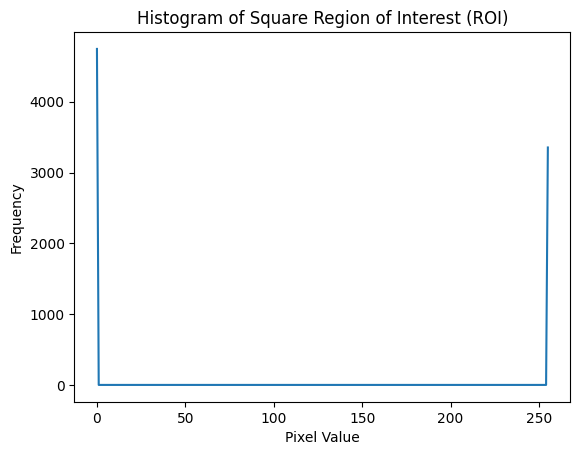

In [184]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask3 = np.zeros_like(n_ready1)
roi_mask3[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist4 = cv2.calcHist([n_ready1], [0], roi_mask3, [256], [0, 256])

# Plot the histogram
plt.plot(hist4)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

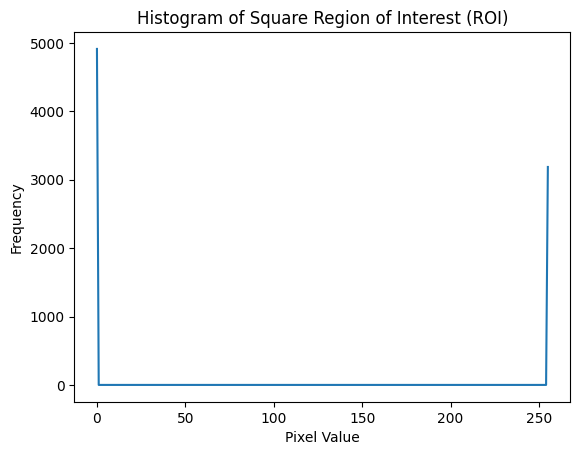

In [185]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask4= np.zeros_like(n_ready2)
roi_mask4[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist5 = cv2.calcHist([n_ready2], [0], roi_mask4, [256], [0, 256])

# Plot the histogram
plt.plot(hist5)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

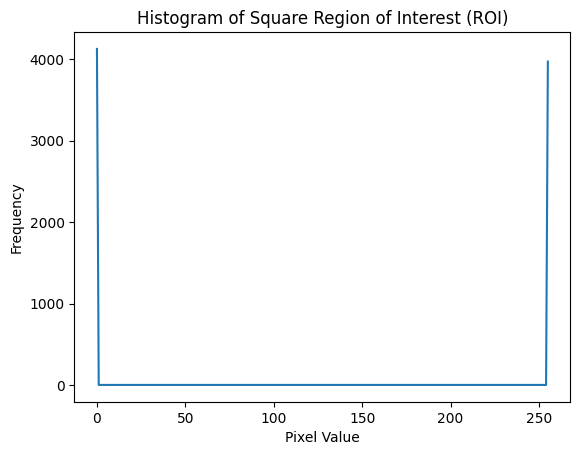

In [186]:
# Define the coordinates (x, y) for the top-left corner of the square
x, y, size = 130,50,90

# Create a binary mask for the square region of interest
roi_mask5= np.zeros_like(n_ready3)
roi_mask5[y:y+size, x:x+size] = 1

# Calculate the histogram of the square region of interest using the mask
hist6= cv2.calcHist([n_ready3], [0], roi_mask5, [256], [0, 256])

# Plot the histogram
plt.plot(hist6)
plt.title('Histogram of Square Region of Interest (ROI)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [187]:
# Compute the chi-squared distance
chi_squared_distance4 = cv2.compareHist(hist4, hist5, cv2.HISTCMP_CHISQR)

threshold = 1

if chi_squared_distance4 < threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are dissimilar.


In [188]:
chi_squared_distance4

14.191462992656653

In [189]:
# Compute the chi-squared distance
chi_squared_distance5 = cv2.compareHist(hist4, hist6, cv2.HISTCMP_CHISQR)


threshold = 1
if chi_squared_distance5 < threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are dissimilar.


In [190]:
chi_squared_distance5

194.34401778505503

Try correlation cofficient method

In [191]:
## Try with correlation cofficient method

In [192]:
# Compute the correlation coefficient
correlation_coefficient = cv2.compareHist(hist, hist2, cv2.HISTCMP_CORREL)

threshold = 0.95

if correlation_coefficient > threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are similar.


In [193]:
correlation_coefficient

0.9986718338821162

In [194]:
# Compute the correlation coefficient
correlation_coefficient = cv2.compareHist(hist, hist3, cv2.HISTCMP_CORREL)


threshold = 0.95
if correlation_coefficient > threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are similar.


In [195]:
correlation_coefficient

0.998706394118018

In [196]:
# Compute the correlation coefficient
correlation_coefficient = cv2.compareHist(hist4, hist5, cv2.HISTCMP_CORREL)


threshold = 0.95

if correlation_coefficient > threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are similar.


In [197]:
correlation_coefficient

0.9992040235300688

In [198]:
# Compute the correlation coefficient
correlation_coefficient = cv2.compareHist(hist4, hist6, cv2.HISTCMP_CORREL)

threshold = 0.95

if correlation_coefficient > threshold:
    print("Objects are similar.")
else:
    print("Objects are dissimilar.")

Objects are similar.


In [199]:
correlation_coefficient

0.9885438876302721

**Question 7**

In [200]:
## Correlation worked best for the similarity measures than chi square, Lets calculate the accuracy
## for both ready and not ready
total_prediction= 2
total_positive=2
accuracy= (total_positive/ total_prediction*100)
print("The accuracy of the model is",accuracy,"%")

The accuracy of the model is 100.0 %


In [201]:
## Conclusion is on the power point